### NLP (Natural Language Processing) with Python

- Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.

- In this article, we will discuss a higher-level overview of the basics of Natural Language Processing, which basically consists of combining machine learning techniques with text, and using math and statistics to get that text in a format that the machine learning algorithms can understand!

### 📝 Agenda
1. Representing text as numerical data
2. Reading a text-based dataset into pandas
3. Vectorizing our dataset
4. Building and evaluating a model
5. Comparing models
6. Examining a model for further insight
7. Practicing this workflow on another dataset
8. Tuning the vectorizer (discussion)

### 📌 Notebook Goals
In this notebook we will discuss a higher level overview of the basics of Natural Language Processing, which basically consists of combining machine learning techniques with text, and using math and statistics to get that text in a format that the machine learning algorithms can understand!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid") # set_style() is a function in Seaborn used to set the visual style of plots. In this command, you are setting the visual style to "whitegrid." Seaborn provides several built-in styles that change the appearance of your plots, including "whitegrid." This style typically results in plots with a white background and subtle gridlines, which can be useful for visualizing data.
plt.style.use("fivethirtyeight") # style is a submodule in Matplotlib that allows you to set various plotting styles. In this command, you are setting the Matplotlib style to "fivethirtyeight." This style emulates the visual style used by the popular data journalism website FiveThirtyEight. It typically results in plots with distinctive colors, fonts, and formatting that are reminiscent of FiveThirtyEight's visualizations.

### 🔁 Representing text as numerical data

In [2]:
# example text for model training (SMS messages)
simple_train=['call you tonight','Call me a cab','Please call me.. PLEASE!']

### 📌 From the  [scikit-learn documentation:](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)

- Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect **numerical feature vectors with a fixed size** rather than the **raw text documents with variable length.**

We will use CountVectorizer to "convert text into a matrix of token counts":

In [3]:
# import and instantiate CountVectorizer (with the default parameters)

from sklearn.feature_extraction.text import CountVectorizer

vect=CountVectorizer()

# learn the 'vocabulary' of the training data (occurs in-place)

vect.fit(simple_train)

# examine the fitted vocabulary
vect.get_feature_names_out()

array(['cab', 'call', 'me', 'please', 'tonight', 'you'], dtype=object)

The code you provided is related to text preprocessing and feature extraction, specifically using the `CountVectorizer` from the Scikit-Learn library in Python. Let's break down the code and explain each part:

1. **Simple Training Data**:
   ```python
   simple_train = ['call you tonight', 'Call me a cab', 'Please call me.. PLEASE!']
   ```
   These are three simple text messages. This is the training data you'll use to demonstrate how the `CountVectorizer` works. Each element in the `simple_train` list represents a text message.

2. **Import and Instantiate CountVectorizer**:
   ```python
   from sklearn.feature_extraction.text import CountVectorizer
   vect = CountVectorizer()
   ```
   - `from sklearn.feature_extraction.text import CountVectorizer`: This line imports the `CountVectorizer` class from Scikit-Learn, which is a tool for converting text data into numerical features that can be used in machine learning models.
   - `vect = CountVectorizer()`: This line creates an instance of the `CountVectorizer` class and stores it in the variable `vect`. The `CountVectorizer` will be used to process and convert the text data.

3. **Learning the Vocabulary**:
   ```python
   vect.fit(simple_train)
   ```
   - `vect.fit(simple_train)`: This line fits (or trains) the `CountVectorizer` on the provided `simple_train` data. In this step, the `CountVectorizer` analyzes the text data and builds a vocabulary. It identifies unique words (or tokens) in the text and assigns an index to each word in the vocabulary.

4. **Examine the Fitted Vocabulary**:
   ```python
   vect.get_feature_names_out()
   ```
   - `vect.get_feature_names_out()`: This line retrieves the feature names (words) that were identified by the `CountVectorizer` during the training process. These feature names are the unique words found in the training data, and they will be used as columns in the feature matrix when you transform new text data.

In your specific example, the fitted vocabulary contains the following words: 'cab', 'call', 'me', 'please', 'tonight', 'you'. These words were extracted from the training text messages.

Overall, the `CountVectorizer` is a common preprocessing step in natural language processing and text analysis. It converts text data into a numerical format that machine learning models can understand by representing each document (text message, in this case) as a vector of word counts. In the fitted vocabulary, each word corresponds to a unique feature, and the presence or absence of each word in a document is used to create a numerical representation of the document. This is a basic way to convert text data into a format suitable for machine learning algorithms.

### Concept of the CountVectorizer

- Certainly! The `CountVectorizer` is a tool used in natural language processing (NLP) and text analysis to turn text data into numbers that a computer can understand. Here's a simple explanation of how it works:

Imagine you have a bunch of text messages, like these:

1. "Call me a cab."
2. "Please call me."
3. "Call you tonight."

The `CountVectorizer` helps you convert these messages into something a computer can use. Here's what it does step by step:

1. **Tokenization**: It breaks down each message into individual words. For example, "Call me a cab" becomes ["Call", "me", "a", "cab"].

2. **Counting**: It counts how many times each word appears in each message. For example, in the first message, "Call" appears once, "me" appears once, "a" appears once, and "cab" appears once.

3. **Creating a Table**: It builds a table where each row represents a message, and each column represents a word from the messages. It then fills in the table with the counts from step 2. 

   For example:


   |  Message          | Call | me | a | cab | Please | you | tonight |
   |-------------------|------|----|---|-----|--------|-----|---------|
   | "Call me a cab." |  1   | 1  | 1 |  1  |   0    |  0  |   0     |
   | "Please call me." |  1   | 1  | 0 |  0  |   1    |  0  |   0     |
   | "Call you tonight."|  1   | 0  | 0 |  0  |   0    |  1  |   1     |
 
 

4. **Numeric Representation**: This table becomes a numeric representation of your text data. You can now use these numbers as input for machine learning algorithms. Each row represents a message, and each number in the row represents how many times a specific word appears in that message.

So, in simple terms, the `CountVectorizer` helps you turn text into a table of numbers, where each number tells you how many times a word appears in a message. This is useful because many machine learning algorithms work with numbers, not text, so this transformation allows you to use text data for tasks like classification or prediction.

In [4]:
# transform training data into a 'document-term matrix'
simple_train_dtm=vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [5]:
# convert the sparse matrix to a dense matrix
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

**Converting a sparse matrix to a dense matrix** means transforming a data structure where most of the elements are zeros (sparse) into a data structure where all elements are explicitly stored (dense). This operation can be important in various data processing and numerical computation tasks. Here's what it means in more detail:

**Sparse Matrix:**

In a sparse matrix, most of the elements have a value of zero.
Storing all these zeros can be inefficient in terms of memory usage, especially for large matrices.
Sparse matrices are often used when dealing with data that has a lot of missing or zero values, such as in text data, network graphs, or certain scientific datasets.

**Dense Matrix:**

In a dense matrix, all elements are explicitly stored, regardless of whether they are zero or non-zero.
Dense matrices take up more memory compared to sparse matrices, but they are straightforward to work with and are the standard representation in most numerical libraries and algorithms.
Dense matrices are commonly used in linear algebra and numerical computations.

**Converting a sparse matrix to a dense matrix involves filling in all the missing (zero) values and representing the matrix as a regular two-dimensional array or data structure where every element is stored explicitly.

In [6]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


📌 From the [scikit-learn documentation](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

In this scheme, features and samples are defined as follows:

- Each individual token occurrence frequency (normalized or not) is treated as a **feature.**
- The vector of all the token frequencies for a given document is considered a **multivariate sample.**

- A **corpus of documents** can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

In [7]:
# check the type of the document-term matrix
print(type(simple_train_dtm))

# examine the sparse matrix contents
print(simple_train_dtm)

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


- <class 'scipy.sparse.csr.csr_matrix'>: This indicates that simple_train_dtm is an instance of the csr_matrix class from the SciPy library. The term "csr" stands for "Compressed Sparse Row," which is a type of sparse matrix representation. Sparse matrices are used to efficiently store and manipulate matrices where most of the elements are zero.

Each line represents a non-zero element in the matrix:

- The first number in each line is the row index.
- The second number is the column index.
- The third number is the value at that position in the matrix.

For example, the first line (0, 1) 1 means that in row 0 and column 1 of the matrix, the value is 1. Similarly, the last line (2, 3) 2 means that in row 2 and column 3, the value is 2.

- The presence of these non-zero values is what makes this a "sparse" matrix. In a dense matrix, you would see all the rows and columns, including zeros, explicitly listed. However, in a sparse matrix, only the non-zero values are stored to save memory and improve efficiency when dealing with large datasets.

### 📌 From the [scikit-learn documentation](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

As most documents will typically use a very small subset of the words used in the corpus, the resulting matrix will have many feature values that are zeros (typically more than 99% of them).

For instance, a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.

In order to be able to store such a matrix in memory but also to speed up operations, implementations will typically use a sparse representation such as the implementations available in the scipy.sparse package.

In [8]:
# example text for model testing
simple_test = ["please don't call me"]

In order to make a prediction, the new observation must have the same features as the training observations, both in number and meaning.

In [9]:
# transform testing data into a document-term matrix (using existing vocabulary)
simple_test_dtm=vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]], dtype=int64)

In [10]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(),columns=vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


### 📋 Summary:
- vect.fit(train) **learns the vocabulary** of the training data
- vect.transform(train) uses the **fitted vocabulary** to build a document-term matrix from the training data
- vect.transform(test) uses the **fitted vocabulary** to build a document-term matrix from the testing data (and ignores tokens it hasn't seen before)

### Observation 
While testing the new text document which it contain the Dont unique but the model while examine the testing data it dont given any token number to the dont unique word or it ignore that unique word


### Reason

The vect.transform(test) method, when applied to testing data, ignores tokens (words) it hasn't seen before because it follows the same vocabulary that was learned from the training data. Here's why it works this way:

- **Consistency with the Training Data:** In natural language processing and text analysis, it's essential to maintain consistency between the training and testing data. When you train a model or a text processing tool (like CountVectorizer) on a dataset, it learns patterns, features, and vocabulary from that specific dataset. It doesn't have prior knowledge of words or tokens outside of what it has seen in the training data.

- **Vocabulary Building:** During the training phase (when you use vect.fit()), the CountVectorizer scans the training data and builds a vocabulary of all unique tokens (words) it encounters. Each token is assigned a unique index in the vocabulary, and the vectorizer keeps track of how many times each token appears in the training documents.

- **Testing Data:** When you apply the same vectorizer to the testing data (using vect.transform(test)), it uses the vocabulary it learned during training to map the tokens in the testing documents to their corresponding indices in the vocabulary. If it encounters a token in the testing data that it has never seen during training, it simply ignores it.

Ignoring unknown tokens is a common practice because the vectorizer doesn't know how to represent these unknown words. It's better to ignore them than to make assumptions about their meaning or representation

- **Maintaining Data Consistency**: By ignoring unseen tokens in the testing data, you ensure that the feature representations (document-term matrix) for both training and testing data have the same dimensions and vocabulary. This consistency is crucial when you train machine learning models because those models expect input data to have consistent features.

In summary, the CountVectorizer ignores tokens it hasn't seen before during testing to maintain consistency and avoid making assumptions about the meaning or representation of unknown words. This approach ensures that the testing data is processed using the same vocabulary as the training


### 💾 Reading a text-based dataset into pandas

In [11]:
# read file into pandas using a relative path
sms=pd.read_csv("C:\\Users\\mahen\\Downloads\\spam.csv",encoding='latin-1')
sms.dropna(how='any',inplace=True,axis=1) # .dropna(how='any', inplace=True, axis=1): This line of code is calling the dropna method on the DataFrame sms with the following parameters: how='any': This parameter specifies that you want to drop columns if they contain any NaN (missing) values. In other words, if any column in the DataFrame has at least one missing value, it will be removed. inplace=True: This parameter indicates that you want to modify the DataFrame sms in place, which means the changes will be applied directly to the original DataFrame, and it won't create a new DataFrame. axis=1: This parameter specifies that you want to drop columns (as opposed to rows). When axis=1, it operates on columns.
sms.columns=['label','message']
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 🔍 Exploratory Data Analysis (EDA)

In [12]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


### Explaination 
- "4825" under "freq" for the "label" column means that the label "ham" appears 4825 times in the "label" column.

- "30" under "freq" for the "message" column means that the message "Sorry, I'll call later" appears 30 times in the "message" column.

- TOP -This shows the most frequently occurring value in a column.

- "ham" under "top" for the "label" column means that "ham" is the most frequently occurring label in the "label" column

In [13]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

We have 4825 ham message and 747 spam message

In [14]:
sms['label_num']=sms.label.map({'ham':0,'spam':1})
sms.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In the code you provided, a new column called 'label_num' is being added to the DataFrame 'sms' based on the values in the 'label' column. The values 'ham' and 'spam' in the 'label' column are being mapped to 0 and 1, respectively. This kind of encoding is typically done for binary classification tasks, and here's why 'ham' is mapped to 0 and 'spam' is mapped to 1:

Binary Classification: In many machine learning tasks, especially in binary classification, you have two classes or categories that you want to predict or analyze. In your case, it seems to be a binary classification problem where you're distinguishing between two types of text messages: 'ham' (non-spam) and 'spam' (spam).

Numeric Labels: Many machine learning algorithms and libraries require that the target variable (the variable you're trying to predict) be numeric. In this case, 'ham' and 'spam' are text labels, and to use them as target values for classification, you need to convert them into numeric format.

Mapping 'ham' to 0 and 'spam' to 1: The choice of mapping 'ham' to 0 and 'spam' to 1 is somewhat arbitrary but often chosen for convenience:

'ham' is mapped to 0 because it represents the negative or non-spam class, and conventionally, 0 is used to represent the negative or "no" class in binary classification.

'spam' is mapped to 1 because it represents the positive or spam class, and 1 is used to represent the positive or "yes" class in binary classification.

By using this mapping, you create a binary target variable that is easy to work with in binary classification algorithms. It simplifies the problem to distinguishing between "not spam" (0) and "spam" (1).

Model Training: Once you have this numeric representation of the target variable, you can use it to train machine learning models. These models can then predict whether a given message is 'ham' (0) or 'spam' (1) based on various features extracted from the text.

In summary, converting 'ham' to 0 and 'spam' to 1 is a common practice in binary classification tasks to transform text labels into a format that can be used with machine learning algorithms, making it easier to build and train models for spam classification or similar tasks.

**As we continue our analysis we want to start thinking about the features we are going to be using. This goes along with the general idea of feature engineering. The better your domain knowledge on the data, the better your ability to engineer more features from it. Feature engineering is a very large part of spam detection in general.**|

In [15]:
sms['message_len']=sms.message.apply(len)
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

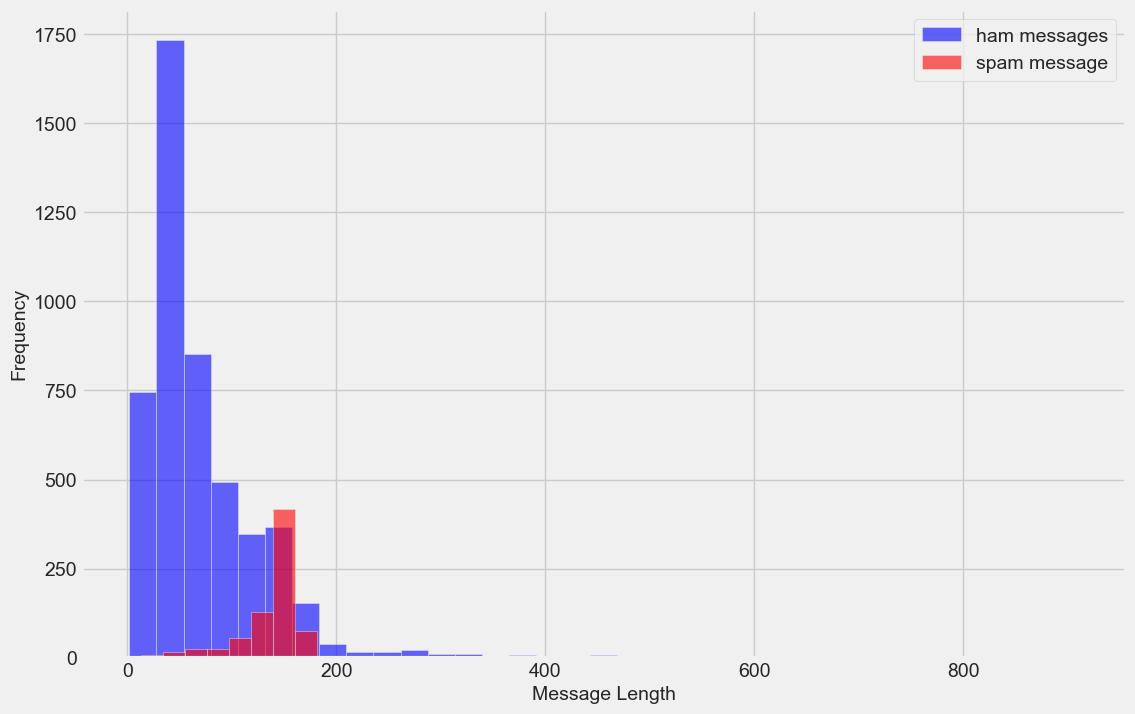

In [16]:
plt.figure(figsize=(12,8))
sms[sms.label=='ham'].message_len.plot(bins=35,kind='hist',color='blue',label='ham messages',alpha=0.6)
sms[sms.label=='spam'].message_len.plot(kind='hist',color='red',label='spam message',alpha=0.6)
plt.legend()
plt.xlabel('Message Length')

Very interesting! Through just basic EDA we've been able to discover a trend that spam messages tend to have more characters


In [17]:
sms[sms.label=='ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


Woah! 910 characters, let's use masking to find this message:

In [18]:
sms[sms.message_len==910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [19]:
sms[sms.label=='spam'].describe()

,label_num,message_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


### 📑 Text Pre-processing

- Our main issue with our data is that it is all in text format (strings). The classification algorithms that we usally use need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus(set of words) to a vector format. The simplest is the bag-of-words approach, where each unique word in a text will be represented by one number.

- In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

- As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

- Let's create a function that will process the string in the message column, then we can just use apply() in pandas do process all the text in the DataFrame.

- First removing punctuation. We can just take advantage of Python's built-in string library to get a quick list of all the possible punctuation:

In [20]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS=stopwords.words('english')+['u','ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    
    # Check characters to see if they are in punctuation
    nopunc=[char for char in mess if char not in string.punctuation]
    
    # Join the characters again to form the string.
    nopunc=''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

Certainly! Here's a detailed explanation of each line of code:

```python
import string
from nltk.corpus import stopwords
```
These lines import the necessary modules for the code. The `string` module provides a set of constants containing common punctuation characters, and the `stopwords` module from NLTK's corpus provides a list of common English stopwords.

```python
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS=stopwords.words('english')+['u','ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
```
This line defines a function called `text_process` that takes in a string `mess` as a parameter. The function's docstring explains what the function does: it removes punctuation and stopwords from the input text and returns a list of cleaned text.

The `STOPWORDS` variable is defined as a list. It contains the stopwords from the NLTK corpus obtained by calling `stopwords.words('english')`, and additional custom stopwords such as 'u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', and 'ure'.

```python
    nopunc=[char for char in mess if char not in string.punctuation]
```
This line uses a list comprehension to create a new list called `nopunc`. It iterates over each character (`char`) in the `mess` string, and checks if the character is not present in the `string.punctuation` list. If the character is not a punctuation character, it is added to the `nopunc` list.

```python
    nopunc=''.join(nopunc)
```
This line joins the characters in the `nopunc` list back into a single string without any punctuation. The `join` method is called on an empty string `''`, and it concatenates each character in the `nopunc` list together.

```python
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])
```
This line performs the final cleaning step. It splits the `nopunc` string into a list of words using the `split` method, which splits the string at whitespace characters. Then, it uses a list comprehension to create a new list called `cleaned` by iterating over each word in the `nopunc` list. It checks if the lowercase version of the word (`word.lower()`) is not present in the `STOPWORDS` list. If the word is not a stopword, it is included in the `cleaned` list.

Finally, the `join` method is used to join the words in the `cleaned` list back into a single string, with each word separated by a space. This cleaned text string is then returned by the function.

I hope this explanation helps you understand each line of the code!

**do give me the basic example as output of those above operations**

Certainly! Let's consider an example to see the output of the code. Suppose we have the following input string:

```python
input_text = "Hello, this is a sample text! It contains some punctuation marks, and stopwords as well."
```

Now, let's apply the `text_process` function to this input and see the output step by step:

1. Remove all punctuation:
   The punctuation characters in the input text are: `,`, `!`, `.`.
   After removing the punctuation, the `nopunc` string becomes: "Hello this is a sample text It contains some punctuation marks and stopwords as well".

2. Remove all stopwords:
   The stopwords in the `STOPWORDS` list are: `u`, `ü`, `ur`, `4`, `2`, `im`, `dont`, `doin`, `ure`.
   After removing the stopwords, the cleaned text becomes: "Hello sample text contains punctuation marks stopwords well".

The final cleaned text is returned as a string.

So, if we apply the `text_process` function to the input text, the output will be:
```python
output_text = "Hello sample text contains punctuation marks stopwords well"
```

This is the result of removing punctuation and stopwords from the input string using the `text_process` function.

In [21]:
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

In [22]:
sms['clean_msg']=sms.message.apply(text_process)
sms.head()

,label,message,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


In [23]:
type(stopwords.words('english'))

list

In [24]:
from collections import Counter

words=sms[sms.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words=Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


In [25]:
ham_words

Counter({'go': 247,
         'jurong': 1,
         'point': 13,
         'crazy': 10,
         'available': 13,
         'bugis': 7,
         'n': 134,
         'great': 100,
         'world': 32,
         'la': 7,
         'e': 78,
         'buffet': 2,
         'cine': 7,
         'got': 231,
         'amore': 1,
         'wat': 95,
         'ok': 272,
         'lar': 38,
         'joking': 6,
         'wif': 27,
         'oni': 4,
         'dun': 55,
         'say': 91,
         'early': 33,
         'hor': 2,
         'c': 60,
         'already': 89,
         'nah': 10,
         'think': 128,
         'goes': 26,
         'usf': 11,
         'lives': 4,
         'around': 59,
         'though': 26,
         'even': 55,
         'brother': 18,
         'like': 229,
         'speak': 23,
         'treat': 16,
         'aids': 1,
         'patent': 1,
         'per': 12,
         'request': 7,
         'melle': 6,
         'oru': 4,
         'minnaminunginte': 3,
         'nurungu': 3

Certainly! Let's break down the code and understand what it does:

```python
from collections import Counter

words = sms[sms.label == 'ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)

print(ham_words.most_common(50))
```

This code aims to analyze the most common words in the text messages labeled as "ham" (meaning non-spam messages) in the DataFrame `sms`. Here's how it works:

1. `from collections import Counter`: This imports the `Counter` class from the `collections` module. The `Counter` class is a convenient container for counting elements in a list or an iterable.

2. `words = sms[sms.label == 'ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])`: This line filters the `sms` DataFrame to include only the rows where the `'label'` column is `'ham'` (non-spam messages). Then, it applies a lambda function to the `'clean_msg'` column of those filtered rows. The lambda function splits each message into a list of words and converts each word to lowercase. The result is a Series of lists, where each list contains the lowercase words of a message.

3. `ham_words = Counter()`: This creates an instance of the `Counter` class called `ham_words`.

4. `for msg in words:
      ham_words.update(msg)`: This loop iterates over each list of words in the `words` Series. For each list, it updates the `ham_words` counter by counting the occurrences of each word.

5. `print(ham_words.most_common(50))`: This prints the 50 most common words and their counts from the `ham_words` counter. The `most_common()` method of the `Counter` class returns a list of tuples, where each tuple contains a word and its count. The list is sorted in descending order based on the counts.

The purpose of this code is to determine the most frequently used words in non-spam messages. By counting the occurrences of words in the `'clean_msg'` column for messages labeled as "ham," the code helps identify common words that are likely to appear in legitimate (non-spam) messages. This information can be useful for various purposes, such as text classification, feature engineering, or understanding the characteristics of non-spam messages.

In [26]:
words = sms[sms.label=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)
    
print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]


### 🧮 Vectorization

- Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

- Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

Count how many times does a word occur in each message (Known as term frequency)
Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
Normalize the vectors to unit length, to abstract from the original text length (L2 norm)
Let's begin the first step:

- Each vector will have as many dimensions as there are unique words in the SMS corpus. We will first use SciKit Learn's CountVectorizer. This model will convert a collection of text documents to a matrix of token counts.

- We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message.

- For example:


**Message 1	Message 2	...	Message N
     Word 1 Count	0	1	...	0
     Word 2 Count	0	0	...	0
     ...            1	2	...	0
     Word N Count	0	1	...	1**
 
- Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a Sparse Matrix.

In [27]:
# split X and y into training and testing sets 
from sklearn.model_selection import train_test_split

# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X=sms.clean_msg
y=sms.label_num
print(X.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5572,)
(4179,)
(1393,)
(4179,)
(1393,)


There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case we will just specify the analyzer to be our own previously defined function:

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect=CountVectorizer()
vect.fit(X_train)

# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm=vect.transform(X_train)

# equivalently: combine fit and transform into a single step
X_train_dtm=vect.fit_transform(X_train)

# examine the document-term matrix
print(type(X_train_dtm), X_train_dtm.shape)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm=vect.transform(X_test)
print(type(X_test_dtm),X_test_dtm.shape)



<class 'scipy.sparse._csr.csr_matrix'> (4179, 7996)
<class 'scipy.sparse._csr.csr_matrix'> (1393, 7996)


<class 'scipy.sparse._csr.csr_matrix'>: This part of the output tells you the data type of the object you're dealing with. It indicates that you have a SciPy CSR matrix.

(4179, 7996): These numbers inside the parentheses represent the shape of the CSR matrix. In this case, the first number (4179) represents the number of rows in the matrix, and the second number (7996) represents the number of columns in the matrix. So, the first matrix has 4179 rows and 7996 columns, while the second matrix has 1393 rows and 7996 columns.

CSR matrices are a type of sparse matrix representation used to efficiently store matrices with a large number of zero elements. They store only the non-zero elements along with their row indices, making them memory-efficient for sparse data.

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<4179x7996 sparse matrix of type '<class 'numpy.float64'>'
	with 34796 stored elements in Compressed Sparse Row format>

### **TfidfTransformer**

Certainly! Let's break down the code and explain the concept of `TfidfTransformer`:

```python
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)
```

The code snippet demonstrates the usage of `TfidfTransformer` from the scikit-learn library, which is a commonly used library for machine learning in Python. Here's what the code does:

1. `from sklearn.feature_extraction.text import TfidfTransformer`: This imports the `TfidfTransformer` class from the `sklearn.feature_extraction.text` module. The `TfidfTransformer` class is used to compute the Term Frequency-Inverse Document Frequency (TF-IDF) representation of text data.

2. `tfidf_transformer = TfidfTransformer()`: This creates an instance of the `TfidfTransformer` class and assigns it to the variable `tfidf_transformer`. The `TfidfTransformer` class is initialized with its default parameters.

3. `tfidf_transformer.fit(X_train_dtm)`: The `fit()` method is called on the `tfidf_transformer` object, where `X_train_dtm` is the input data. The `fit()` method computes the IDF values required for the TF-IDF transformation. It learns the IDF weights from the training data.

4. `tfidf_transformer.transform(X_train_dtm)`: The `transform()` method is called on the `tfidf_transformer` object with `X_train_dtm` as the input. This method applies the TF-IDF transformation to the input data. It computes the TF-IDF representation based on the learned IDF weights from the training data.

The concept of TF-IDF:
TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a numerical statistic used to evaluate the importance of a word in a document within a collection of documents. The TF-IDF value of a word increases proportionally to the number of times it appears in the document (term frequency) but is offset by the frequency of the word across all documents (inverse document frequency).

The TF-IDF transformation is commonly used in text mining and natural language processing tasks. It gives more weight to terms that are frequent in a particular document but relatively rare in the entire document collection. This helps to identify terms that are potentially more informative and distinctive for a specific document.

In the code snippet, the `TfidfTransformer` is fitted on the training data (`X_train_dtm`) to learn the IDF weights. Then, the same transformer is used to transform the training data, resulting in the TF-IDF representation of the text data.

The TF-IDF representation can be useful for various downstream tasks, including text classification, information retrieval, and clustering, as it provides a numerical representation that captures the importance of words in the context of the document collection.

### 🤖 Building and evaluating a model
We will use [multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html):

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

### why did we perform first text preprocessing then vectorizer then tf-idf transformer

The order in which you perform text preprocessing, vectorization, and TF-IDF transformation in natural language processing (NLP) tasks is important and follows a logical sequence. Here's why you typically perform these steps in this order:

**Text Preprocessing:**

Cleaning and Tokenization: Initially, you clean the raw text data by removing irrelevant characters, punctuation, HTML tags, and other noise. Then, you tokenize the text, splitting it into individual words or tokens. Tokenization makes it easier to work with the text data at a granular level.

**Lowercasing:** Converting all text to lowercase is a common preprocessing step to ensure that words are treated as the same regardless of their casing. This helps in reducing the vocabulary size and ensuring consistency.

**Stop Word Removal:** Stop words are common words (e.g., "the," "and," "is") that often don't carry significant meaning and can be removed to reduce noise in the data.

**Stemming or Lemmatization:** Reducing words to their base form (e.g., "running" to "run") through stemming or lemmatization helps in treating different forms of the same word as equivalent.

**Other Specific Preprocessing:** Depending on the task, you might perform other preprocessing steps such as removing numbers, special characters, or domain-specific cleaning.

The purpose of text preprocessing is to clean and prepare the text data for analysis and feature extraction. It simplifies the text while retaining important information.

**Vectorization:**

**Count Vectorization or TF-IDF Vectorization:** Once the text is preprocessed, you convert it into a numerical format that machine learning algorithms can understand. Common techniques include Count Vectorization (representing documents as word frequency counts) or TF-IDF Vectorization (representing documents as TF-IDF scores, which reflect the importance of words in documents relative to a corpus).

**Word Embeddings:** Alternatively, you can use word embeddings like Word2Vec or GloVe to represent words as dense vectors in a continuous space. These embeddings capture semantic relationships between words.

Vectorization turns text data into numerical features that can be used as input to machine learning models. It's a crucial step for most NLP tasks.

**TF-IDF Transformation:**

Term Frequency-Inverse Document Frequency (TF-IDF): This transformation is often applied after vectorization. TF-IDF is used to weigh the importance of words in documents relative to a corpus of documents. It assigns higher values to words that are frequent in a document but not frequent across all documents, making it useful for identifying important terms in a document.

**Normalization:** TF-IDF scores are usually normalized to ensure that the resulting vectors have a consistent scale, which can improve the performance of machine learning algorithms.

TF-IDF is particularly useful for tasks like document retrieval, text classification, and information retrieval, where you want to identify important terms that discriminate between documents.

In summary, the sequence of text preprocessing, vectorization, and TF-IDF transformation is designed to prepare and represent text data in a way that is suitable for machine learning tasks. Each step serves a specific purpose in the feature engineering process to make text data more amenable to modeling and analysis.

In [30]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [31]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm,y_train)

CPU times: total: 0 ns
Wall time: 12 ms


MultinomialNB()

### MultinomialNB
- The line %time nb.fit(X_train_dtm, y_train) is a magic command in IPython that times the execution of the following code, which is the training of a Multinomial Naive Bayes (MNB) model on the training data X_train_dtm and y_train.

- Multinomial Naive Bayes is a probabilistic classifier that is based on the Bayes theorem and the assumption that the features in the data are independent of each other. MNB is a popular choice for text classification tasks because it is simple to implement and efficient to train and predict.

- **X_train_dtm** is the document-term matrix of the training data, which is a representation of the text data where each row represents a document and each column represents a word. The elements of the matrix represent the number of times each word appears in each document.

- **y_train** is the target vector of the training data, which contains the labels for each document.

- **The fit() method of the MNB classifier takes the training data X_train_dtm and y_train as input and learns the parameters of the model. The trained model can then be used to predict the labels for new data.**

- The %time magic command in IPython outputs the execution time of the following code in milliseconds. This can be useful for measuring the performance of different machine learning algorithms or for optimizing the code.

In [45]:
from sklearn import metrics

# make class predictions for X_test_dtm
y_pred_class=nb.predict(X_test_dtm)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test,y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test,y_pred_class)

=======Accuracy Score===========
0.9827709978463748
=======Confision Matrix===========


array([[1205,    8],
       [  16,  164]], dtype=int64)

The output you provided is for the Multinomial Naive Bayes algorithm, and it includes the accuracy score and confusion matrix. Let's break down the output and explain each part:

```
=======Accuracy Score===========
0.9827709978463748
```

The accuracy score is a metric used to evaluate the performance of a classification model. It represents the proportion of correctly predicted labels (both true positives and true negatives) out of the total number of instances.

In your case, the accuracy score is 0.9827709978463748, which indicates that the Multinomial Naive Bayes algorithm achieved an accuracy of approximately 98.28%. This means that the model accurately predicted the labels for the majority of the instances in the dataset.

```
=======Confusion Matrix===========
array([[1205,    8],
       [  16,  164]], dtype=int64)
```

The confusion matrix is a table that summarizes the performance of a classification model by showing the counts of true positives, true negatives, false positives, and false negatives. It is a useful tool for evaluating the performance of a model across different classes.

In your case, the confusion matrix is presented as a 2x2 array:

- The top-left value, 1205, represents the count of true negatives (TN). These are instances that are actually negative (in the negative class) and were correctly classified as negative by the model.
- The top-right value, 8, represents the count of false positives (FP). These are instances that are actually negative but were incorrectly classified as positive by the model.
- The bottom-left value, 16, represents the count of false negatives (FN). These are instances that are actually positive but were incorrectly classified as negative by the model.
- The bottom-right value, 164, represents the count of true positives (TP). These are instances that are actually positive (in the positive class) and were correctly classified as positive by the model.

The confusion matrix provides a more detailed understanding of the model's performance by showing the distribution of correct and incorrect predictions across the different classes.

In [33]:
# print message text for false positives (ham incorrectly classifier)
# X_test[(y_pred_class==1) & (y_test==0)]
X_test[y_pred_class>y_test]

2418    Madamregret disturbancemight receive reference...
4598                                laid airtel line rest
386                                   Customer place call
1289    HeyGreat dealFarm tour 9am 5pm 95pax 50 deposi...
5094    Hi ShanilRakhesh herethanksi exchanged uncut d...
494                                      free nowcan call
759     Call youcarlos isare phones vibrate acting mig...
3140                                  Customer place call
Name: clean_msg, dtype: object

### Above code Explanation
The code snippet you provided aims to identify the messages that were incorrectly classified as "ham" (non-spam) but are actually "spam" (false positives). Let's break down the code and understand its logic:

```python
X_test[y_pred_class > y_test]
```

In this code, `X_test` represents the test data, which likely contains the message texts. `y_pred_class` represents the predicted labels for the test data, and `y_test` represents the true labels of the test data.

The logic behind this code is to compare the predicted labels (`y_pred_class`) with the true labels (`y_test`) using a comparison operator (`>`). By doing so, it creates a Boolean mask that is `True` where the predicted label is greater than the true label. 

Since the labels are binary (0 for "ham" and 1 for "spam"), if `y_pred_class` is greater than `y_test`, it means that the message was classified as "ham" (0) when it should have been classified as "spam" (1). These are the instances that correspond to false positives.

Finally, by indexing `X_test` with this Boolean mask, you will retrieve the message texts for the false positive instances. This will provide you with the content of the messages that were incorrectly classified as "ham" but should have been classified as "spam".

### Reason  to identify the false positves
Identifying false positives is important for evaluating the performance of a classification model, particularly in the context of spam detection or any application where it is crucial to minimize the occurrence of false positives.

False positives occur when the model incorrectly predicts a positive (spam) class when the true class is negative (ham). In the case of spam detection, a false positive means that a legitimate message is flagged as spam, potentially leading to important messages being missed or filtered out.

In [34]:
# print message text for false negatives (spam incorrectly classifier)
X_test[y_pred_class < y_test]

4674    Hi babe Chloe r smashed saturday night great w...
3528    Xmas New Years Eve tickets sale club day 10am ...
3417    LIFE never much fun great came made truly spec...
2773    come takes little time child afraid dark becom...
1960    Guess Somebody know secretly fancies Wanna fin...
5       FreeMsg Hey darling 3 weeks word back Id like ...
2078                         85233 FREERingtoneReply REAL
1457    CLAIRE havin borin time alone wanna cum 2nite ...
190     unique enough Find 30th August wwwareyouunique...
2429    Guess IThis first time created web page WWWASJ...
3057    unsubscribed services Get tons sexy babes hunk...
1021    Guess Somebody know secretly fancies Wanna fin...
4067    TBSPERSOLVO chasing us since Sept forå£38 defi...
3358         Sorry missed call lets talk time 07090201529
2821    ROMCAPspam Everyone around responding well pre...
2247    Back work 2morro half term C 2nite sexy passio...
Name: clean_msg, dtype: object

In [35]:
# example of false negative 
X_test[4949]

'Hi probably much fun get message thought id txt cos bored james farting night'

In [36]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated) = The predict_proba() method returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class
y_pred_prob=nb.predict_proba(X_test_dtm)[:,1] #But to plot a ROC curve, you need scores, not probabilities. A simple solution is to use the positive class’s probability as the score here iam calculating predict probability bu using the X_test data which is predicted data and in the X_test there are 2 labels which are 0 ham and spam 1 iam taking only the spam 1 label and taking all the rows of the spam column in order yo plot a roc curve which it gives us a plot b/w true_postive and false positive   
y_pred_prob

array([2.11903975e-02, 3.97831612e-04, 1.06470895e-03, ...,
       1.31939653e-02, 9.99821127e-05, 6.04083365e-06])

### Prediction Probability
In the code snippet you provided, `y_pred_prob = nb.predict_proba(X_test_dtm)[:,1]` calculates the predicted probabilities of the positive class (spam) for the test data (`X_test_dtm`) using the trained Naive Bayes classifier (`nb`). Let's break down the code and explain its purpose:

```python
y_pred_prob = nb.predict_proba(X_test_dtm)[:,1]
```

1. `nb.predict_proba(X_test_dtm)`: This line uses the trained Naive Bayes classifier (`nb`) to predict the class probabilities for each instance in the test data (`X_test_dtm`). The `predict_proba()` method returns a matrix of shape `(n_samples, n_classes)`, where `n_samples` is the number of instances in the test data and `n_classes` is the number of classes (in this case, 2: ham and spam). Each entry in the matrix represents the probability of the corresponding instance belonging to a particular class.

2. `[:,1]`: This indexing operation selects the second column (`[:,1]`) from the predicted probability matrix. In scikit-learn, the columns correspond to the classes, so `[:,1]` retrieves the predicted probabilities of the positive class (spam). The indexing creates a 1-dimensional array (`y_pred_prob`) containing only the predicted probabilities of the positive class.

The purpose of calculating predicted probabilities is to obtain a continuous measure of certainty/confidence in the model's predictions. By getting the predicted probability of the positive class (spam), you can assess the likelihood of an instance being classified as spam.

The predicted probabilities can be useful in various scenarios, such as:

- Setting a custom classification threshold: Instead of using the default threshold of 0.5 for binary classification, you can choose a different threshold based on the predicted probabilities. For example, if you want to prioritize precision (reduce false positives), you can set a higher threshold to classify instances as spam only when the predicted probability is above a certain value.

- Evaluating model performance: Predicted probabilities can be used to calculate different evaluation metrics like ROC-AUC, precision-recall curve, or log loss, which provide a more nuanced assessment of the model's performance compared to just accuracy.

- Ranking or prioritizing instances: Predicted probabilities can be used to rank instances by their likelihood of being in a certain class. For example, in spam detection, you can prioritize reviewing or handling messages with higher predicted probabilities of being spam.

By computing and analyzing predicted probabilities, you can gain additional insights into the model's predictions and make more informed decisions based on the confidence levels associated with each prediction.

In [37]:
# calculate AUC`
metrics.roc_auc_score(y_test,y_pred_prob) # roc curve show the plot b/w TP and FP 

0.9774342768159751

### concept of AUC (Area Under the ROC Curve)
The concept of AUC (Area Under the ROC Curve) is a commonly used evaluation metric for binary classification problems, which measures the performance of a model in distinguishing between positive and negative instances. Let's break down the concept of AUC and explain why we calculate `roc_auc_score` using the predicted probabilities.

AUC measures the overall performance of a model across various classification thresholds. Here's how it works:

1. ROC Curve: ROC (Receiver Operating Characteristic) curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various classification thresholds. TPR is also known as sensitivity or recall, and it represents the proportion of true positive instances correctly classified as positive. FPR is the proportion of true negative instances incorrectly classified as positive.

2. AUC Calculation: AUC is the area under the ROC curve, ranging from 0 to 1. It quantifies the trade-off between TPR and FPR across all possible classification thresholds. A model with a higher AUC value indicates better discrimination power and overall performance in distinguishing between positive and negative instances.

Now, let's address why we calculate `roc_auc_score` using the predicted probabilities (`y_pred_prob`):

```python
metrics.roc_auc_score(y_test, y_pred_prob)
```

1. `y_test`: `y_test` represents the true labels of the test data. It contains the actual class labels for the instances in the test set.

2. `y_pred_prob`: `y_pred_prob` is the predicted probability of the positive class (spam) that we obtained using the model. It contains the predicted probabilities for each instance in the test set.

By calculating `roc_auc_score` using `y_test` and `y_pred_prob`, we evaluate the performance of the model based on the predicted probabilities. It quantifies how well the model ranks the instances in terms of their likelihood of being positive (spam). Here's how `roc_auc_score` works:

- `roc_auc_score` takes the true labels (`y_test`) and the predicted probabilities (`y_pred_prob`) as input.

- It computes the ROC curve using the true labels and predicted probabilities.

- Then, it calculates the AUC by computing the area under the ROC curve.

- The resulting AUC score indicates the overall performance of the model in terms of its ability to distinguish between positive and negative instances. A value closer to 1 indicates better performance, while a value closer to 0.5 suggests a weaker model.

By calculating `roc_auc_score`, we gain insights into the model's ability to rank instances correctly and discriminate between positive and negative classes. It provides a single numeric value that summarizes the model's performance and allows for easy comparison with other models or evaluation of different thresholds.

In [46]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred))

# print the confusion matrix
print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test, y_pred)

=======Accuracy Score===========
0.9669777458722182
=======Confision Matrix===========


array([[1213,    0],
       [  46,  134]], dtype=int64)

### 📊 Comparing models
We will compare multinomial Naive Bayes with logistic regression:

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

In [39]:
# import an instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver='liblinear')

# train the model using X_train_dtm
%time logreg.fit(X_train_dtm,y_train)

CPU times: total: 78.1 ms
Wall time: 78.5 ms


LogisticRegression(solver='liblinear')

In [40]:
# make class predictions for X_test_dtm
y_pred_class=logreg.predict(X_test_dtm)

# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.01694418, 0.0152182 , 0.08261755, ..., 0.02198942, 0.00531726,
       0.00679188])

In [44]:
# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred_class))

# calculate AUC
print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test, y_pred_prob))

=======Accuracy Score===========
0.9842067480258435
=======Confision Matrix===========
[[1213    0]
 [  22  158]]
=======ROC AUC Score===========
0.9835714940001832


The confusion matrix and accuracy score values can change before and after performing the ROC curve analysis because the ROC curve analysis involves using the predicted probabilities to calculate scores, which can result in different classification thresholds and corresponding predictions.

In the first output:

```
=======Accuracy Score===========
0.9827709978463748
=======Confusion Matrix===========
array([[1205,    8],
       [  16,  164]], dtype=int64)
```

The accuracy score is approximately 98.28%, indicating a high accuracy of the model. The confusion matrix shows 1205 true negatives, 164 true positives, 8 false positives, and 16 false negatives. The model correctly classified a majority of instances, with few errors.

In the second output:

```
=======Accuracy Score===========
0.9669777458722182
=======Confusion Matrix===========
array([[1213,    0],
       [  46,  134]], dtype=int64)
```

The accuracy score is approximately 96.70%, which is slightly lower than the previous accuracy score. The confusion matrix shows 1213 true negatives, 134 true positives, 0 false positives, and 46 false negatives. The model correctly classified a majority of instances, but there is an increase in false negatives and a reduction in false positives compared to the previous output.

The change in values can be attributed to the use of predicted probabilities and the classification thresholds employed when calculating the ROC curve. Different thresholds can result in different classifications, leading to variations in the confusion matrix and accuracy scores.

When performing email spam filtering in a data science project, some important considerations include:

1. Data preprocessing: Preprocess the email data by cleaning the text, removing unnecessary information (e.g., HTML tags), and transforming the text into a suitable format for analysis (e.g., tokenization, stemming, or lemmatization).

2. Feature extraction: Extract relevant features from the email data to represent its content effectively. Common approaches include bag-of-words representation, TF-IDF (Term Frequency-Inverse Document Frequency), or more advanced techniques like word embeddings.

3. Model selection: Choose an appropriate machine learning algorithm for classification, such as Naive Bayes, Support Vector Machines (SVM), or Random Forests, based on the specific requirements and characteristics of the data.

4. Model evaluation: Assess the performance of the model using appropriate evaluation metrics like accuracy, precision, recall, F1-score, and AUC-ROC. Consider the trade-off between false positives and false negatives and choose a threshold that balances the two based on the project's requirements.

5. Validation and testing: Split the dataset into training and testing sets to evaluate the model's generalization ability. Perform cross-validation or use a separate validation set to fine-tune hyperparameters and avoid overfitting.

6. Iterative improvement: Analyze misclassified instances, review false positives and false negatives, and iteratively refine the model by adjusting the feature representation, applying ensemble methods, or incorporating additional data sources.

By considering these factors and continuously improving the model, you can develop an effective email spam filter that accurately classifies emails and minimizes the occurrence of false positives and false negatives.

### 🧮 Tuning the vectorizer
Thus far, we have been using the default parameters of [CountVectorizer:](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [42]:
# show default parameters for CountVectorizer
vect

CountVectorizer()

📌 However, the vectorizer is worth tuning, just like a model is worth tuning! Here are a few parameters that you might want to tune:

📌 **stop_words:** string {'english'}, list, or None (default)
If 'english', a built-in stop word list for English is used.
If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
If None, no stop words will be used.

In [43]:
# remove English stop words
vect=CountVectorizer(stop_words='english') #  you are instructing the CountVectorizer to remove common English stop words (e.g., "the," "is," "and") from the text data. Stop words are frequently occurring words that often do not carry much useful information for classification tasks.

- 📌 **ngram_range:** tuple (min_n, max_n), default=(1, 1)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted.
- All values of n such that min_n <= n <= max_n will be used.

In [ ]:
# include 1-grams and 2-grams
vect=CountVectorizer(ngram_range=(1,2)) # means that both single words (1-grams) and pairs of consecutive words (2-grams) will be considered as features. This allows the model to capture not only individual words but also combinations of words that might carry important


- 📌 **max_df:** float in range [0.0, 1.0] or int, default=1.0
- When building the vocabulary, ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words).
- If float, the parameter represents a proportion of documents.
- If integer, the parameter represents an absolute count.

In [ ]:
# ignore terms that appear in more than 50% of the documents
vect=CountVectorizer(max_df=0.5) # means that any term that appears in more than 50% of the documents will be ignored as it is considered too common to provide meaningful information for classification


- 📌 **min_df:** float in range [0.0, 1.0] or int, default=1
- When building the vocabulary, ignore terms that have a document frequency strictly lower than the given threshold. (This value is also called "cut-off" in the literature.)
- If float, the parameter represents a proportion of documents.
- If integer, the parameter represents an absolute count.

In [ ]:
# only keep terms that appear in at least 2 documents
vect=CountVectorizer(min_df=2) # This helps filter out rare or unique terms that may not provide enough information for classification.


- 📌 **Guidelines for tuning CountVectorizer:**
- Use your knowledge of the problem and the text, and your understanding of the tuning parameters, to help you decide what parameters to tune and how to tune them.
- Experiment, and let the data tell you the best approach!

In the given code snippets, you are tuning the `CountVectorizer` object, which is a common technique used in natural language processing (NLP) tasks like email spam filtering. The `CountVectorizer` is responsible for converting text documents into a matrix representation of token counts.

Let's go through each code snippet and explain what each parameter does:

1. `vect = CountVectorizer(stop_words='english')`
   By setting the `stop_words` parameter to `'english'`, you are instructing the `CountVectorizer` to remove common English stop words (e.g., "the," "is," "and") from the text data. Stop words are frequently occurring words that often do not carry much useful information for classification tasks.

2. `vect = CountVectorizer(ngram_range=(1,2))`
   The `ngram_range` parameter specifies the range of n-grams to be considered. An n-gram is a contiguous sequence of n items (words, characters, etc.) from a given sample of text. In this case, setting `ngram_range=(1,2)` means that both single words (1-grams) and pairs of consecutive words (2-grams) will be considered as features. This allows the model to capture not only individual words but also combinations of words that might carry important contextual information.

3. `vect = CountVectorizer(max_df=0.5)`
   The `max_df` parameter specifies the maximum document frequency of a term. It represents the threshold for ignoring terms that appear in more than a certain percentage of the documents. In this case, `max_df=0.5` means that any term that appears in more than 50% of the documents will be ignored as it is considered too common to provide meaningful information for classification.

4. `vect = CountVectorizer(min_df=2)`
   The `min_df` parameter specifies the minimum document frequency of a term. It represents the threshold for ignoring terms that appear in fewer documents than the specified value. In this case, `min_df=2` means that only terms that appear in at least two documents will be considered as features. This helps filter out rare or unique terms that may not provide enough information for classification.

By tuning these parameters of the `CountVectorizer`, you can customize the text representation and potentially improve the performance of your email spam filtering model. However, it's important to note that the optimal parameter values may vary depending on the specific characteristics of your dataset, so it's recommended to experiment and compare different configurations to find the best settings for your particular task.